# Analysis of growth metrics for RhizCG manuscript

## Set Variables

In [2]:
workDir = '/home/bryan/RhizCG/figures/'
fullData = '/home/bryan/RhizCG/data/MiSeq_amplicon/PlotData.txt'

#Init

In [3]:
%load_ext rpy2.ipython

In [4]:
%%R
library(lme4)
library(lmerTest)
library(ggplot2)
library(dplyr)
library(pbkrtest)
library(gridExtra)
#library(multcomp)

/home/bryan/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: Matrix

  warnings.warn(x, RRuntimeWarning)
/home/bryan/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: 
Attaching package: ‘lmerTest’


  warnings.warn(x, RRuntimeWarning)
/home/bryan/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: The following object is masked from ‘package:lme4’:

    lmer


  warnings.warn(x, RRuntimeWarning)
/home/bryan/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: The following object is masked from ‘package:stats’:

    step


  warnings.warn(x, RRuntimeWarning)
/home/bryan/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: 
Attaching package: ‘dplyr’


  warnings.warn(x, RRuntimeWarning)
/home/bryan/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWar

### Read plant master table 

In [5]:
%%R -i fullData -i workDir
setwd(workDir)
Master = read.table(fullData, header = TRUE)
Master$Rep = as.factor(Master$Rep)
colnames(Master)

 [1] "Unique"             "PlotID"             "Plant"             
 [4] "Plot"               "Treatment"          "Rep"               
 [7] "DAP"                "Sampling"           "PlantSample"       
[10] "Type"               "Grass_Broad"        "Status"            
[13] "Subfamily"          "Symbol_class"       "Plant_num"         
[16] "Leaf_AreaBiomass_g" "Biomass_T"          "Biomass_P"         
[19] "Leaf_Area_cm2"      "SLA"                "Leaf_N"            
[22] "Leaf_C"             "LeafC_N"            "LNa"               
[25] "Plant_N"            "Plant_C"            "Plant_CN"          
[28] "d15N"               "tN_p"               "BX_act"            
[31] "CB_act"             "LAP_act"            "NAG_act"           
[34] "soil_dw"            "BX_activity_g"      "CB_activity_g"     
[37] "LAP_activity_g"     "NAG_activity_g"     "BX_barefactor"     
[40] "CB_barefactor"      "LAP_barefactor"     "NAG_barefactor"    
[43] "BX_dif"             "CB_dif"             "

In [60]:
%%R
Master$DAP %>% unique

[1] 36 53 57 61 72 79 84 88


# Loop through dates to test for N uptake differences on a sampling date

In [6]:
%%R
Master %>% group_by(Plant, Treatment) %>%
        summarise(N = mean(tN_p),
                 st_dev = sd(tN_p),
                 B= mean(A_Resid_logB),
                 B.se = sd(A_Resid_logB)) %>% print(n=60)

Source: local data frame [46 x 6]
Groups: Plant [?]

    Plant Treatment         N     st_dev           B      B.se
   <fctr>    <fctr>     <dbl>      <dbl>       <dbl>     <dbl>
1  75-062      Nneg 1.2180833 0.31876256 -0.21905200 0.1408799
2  75-062      Npos 1.1363772 0.31101464 -0.31522690 0.3058215
3   ABUTH      Nneg 1.2447473 0.15213099  0.08260322 0.1029025
4   ABUTH      Npos 1.3027344 0.69225888  0.06161444 0.4344922
5   AMAPO      Nneg 1.2339784 0.35356767  0.39436089 0.3689110
6   AMAPO      Npos 2.1634450 0.45455468  0.74980416 0.2048923
7     B73      Nneg 1.4658371 0.43831277 -0.09544085 0.1331802
8     B73      Npos 2.1854472 0.36386498 -0.09514569 0.1961680
9     B97      Nneg 1.2427987 0.37921594 -0.44661295 0.1181844
10    B97      Npos 1.7268705 0.57992872 -0.35909658 0.2242555
11   BARE      Nneg        NA         NA          NA        NA
12   BARE      Npos        NA         NA          NA        NA
13  ECHCG      Nneg 0.7626846 0.30846186  0.05961872 0.3524087
14

# Biomass comparisons in a sampling day

In [7]:
%%R
DATE = c("53", "57", "84")
data = filter(Master, Type != "Maize" & Treatment == "Nneg"| Plant == "B73" & Treatment == "Nneg")

for(d in DATE){ 
    d %>% print
    Sub = filter(data, DAP == d)

   m = lmer(Biomass_P ~ Plant + (1|Rep) , 
           data = Sub, na.rm = TRUE)
          #summary(m1) %>% print
          anova(m, ddf="Kenward-Roger", type=3) %>% print
   
}

[1] "53"
Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
      Sum Sq Mean Sq NumDF DenDF F.value Pr(>F)
Plant 317.71  317.71     1     3  1.6543 0.2887
[1] "57"
Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
      Sum Sq Mean Sq NumDF DenDF F.value  Pr(>F)  
Plant 782.58  782.58     1     3  24.947 0.01544 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
[1] "84"
Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
      Sum Sq Mean Sq NumDF DenDF F.value Pr(>F)
Plant  21649   10825     2     6  3.3005  0.108


In [8]:
%%R
DATE = c("53", "57", "84")
data = filter(Master, Type != "Maize" & Treatment == "Npos"| Plant == "B73" & Treatment == "Npos")

for(d in DATE){ 
    d %>% print
    Sub = filter(data, DAP == d)

   m = lmer(Biomass_P ~ Plant + (1|Rep) , 
           data = Sub, na.rm = TRUE)
          #summary(m1) %>% print
          anova(m, ddf="Kenward-Roger", type=3) %>% print
   
}

[1] "53"
Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
      Sum Sq Mean Sq NumDF DenDF F.value Pr(>F)
Plant   47.8    47.8     1     3 0.35616 0.5927
[1] "57"
Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
      Sum Sq Mean Sq NumDF DenDF F.value Pr(>F)
Plant 842.18  842.18     1     3   4.597 0.1214
[1] "84"
Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
      Sum Sq Mean Sq NumDF DenDF F.value  Pr(>F)  
Plant  73199   36600     2     6  9.3478 0.01434 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


## N uptake comparisons

In [9]:
%%R
DATE = c("53", "57", "84")
data = filter(Master, Type != "Maize" & Treatment == "Nneg"| Plant == "B73" & Treatment == "Nneg")

for(d in DATE){ 
    d %>% print
    Sub = filter(data, DAP == d)

   m = lmer(tN_p ~ Plant + (1|Rep) , 
           data = Sub, na.rm = TRUE)
          #summary(m1) %>% print
          anova(m, ddf="Kenward-Roger", type=3) %>% print
   
}
     

[1] "53"
Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
       Sum Sq Mean Sq NumDF DenDF F.value Pr(>F)
Plant 0.44424 0.44424     1     3  4.0356 0.1381
[1] "57"
Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
       Sum Sq Mean Sq NumDF DenDF F.value  Pr(>F)  
Plant 0.56394 0.56394     1     3  22.724 0.01753 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
[1] "84"
Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
      Sum Sq Mean Sq NumDF DenDF F.value Pr(>F)
Plant 1.0514 0.52571     2     6 0.82931 0.4808


In [10]:
%%R
DATE = c("53", "57", "84")
data = filter(Master, Type != "Maize" & Treatment == "Npos"| Plant == "B73" & Treatment == "Npos")

for(d in DATE){ 
    d %>% print
    Sub = filter(data, DAP == d)

   m = lmer(tN_p ~ Plant + (1|Rep) , 
           data = Sub, na.rm = TRUE)
          #summary(m1) %>% print
          anova(m, ddf="Kenward-Roger", type=3) %>% print
   
}

[1] "53"
Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
      Sum Sq Mean Sq NumDF DenDF F.value Pr(>F)  
Plant 1.3068  1.3068     1     3  7.4121 0.0724 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
[1] "57"
Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
       Sum Sq Mean Sq NumDF DenDF F.value Pr(>F)
Plant 0.30664 0.30664     1     3  1.8992  0.262
[1] "84"
Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
      Sum Sq Mean Sq NumDF DenDF F.value Pr(>F)
Plant 9.2361   4.618     2     6  2.1392 0.1989


# Analysis of maize within a sampling date

In [11]:
%%R
#Biomass
print("Nneg")
DATE = c("72", "79", "88")
data = filter(Master, Type == "Maize" & Treatment == "Nneg")

for(d in DATE){ 
    d %>% print
    Sub = filter(data, DAP == d)

   m = lmer(Biomass_P ~ Plant + (1|Rep) , 
           data = Sub, na.rm = TRUE)
          #summary(m1) %>% print
          anova(m, ddf="Kenward-Roger", type=3) %>% print
   
}

print("Npos")
DATE = c("72", "79", "88")
data = filter(Master, Type == "Maize" & Treatment == "Npos")

for(d in DATE){ 
    d %>% print
    Sub = filter(data, DAP == d)

   m = lmer(Biomass_P ~ Plant + (1|Rep) , 
           data = Sub, na.rm = TRUE)
          #summary(m1) %>% print
          anova(m, ddf="Kenward-Roger", type=3) %>% print
   
}

[1] "Nneg"
[1] "72"
Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
      Sum Sq Mean Sq NumDF DenDF F.value  Pr(>F)  
Plant 4496.5  1498.8     3     9  5.7042 0.01815 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
[1] "79"
Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
      Sum Sq Mean Sq NumDF DenDF F.value  Pr(>F)  
Plant 6416.1  2138.7     3     9  4.0191 0.04546 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
[1] "88"
Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
      Sum Sq Mean Sq NumDF DenDF F.value  Pr(>F)  
Plant 3417.7  1708.8     2     6  5.5156 0.04372 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
[1] "Npos"
[1] "72"
Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
      Sum Sq Mean Sq NumDF DenDF F.value Pr

In [12]:
%%R
#N uptake
print("Nneg")
DATE = c("72", "79", "88")
data = filter(Master, Type == "Maize" & Treatment == "Nneg")

for(d in DATE){ 
    d %>% print
    Sub = filter(data, DAP == d)

   m = lmer(tN_p ~ Plant + (1|Rep) , 
           data = Sub, na.rm = TRUE)
          #summary(m1) %>% print
          anova(m, ddf="Kenward-Roger", type=3) %>% print
   
}

print("Npos")
DATE = c("72", "79", "88")
data = filter(Master, Type == "Maize" & Treatment == "Npos")

for(d in DATE){ 
    d %>% print
    Sub = filter(data, DAP == d)

   m = lmer(tN_p ~ Plant + (1|Rep) , 
           data = Sub, na.rm = TRUE)
          #summary(m1) %>% print
          anova(m, ddf="Kenward-Roger", type=3) %>% print
   
}

[1] "Nneg"
[1] "72"
Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
       Sum Sq Mean Sq NumDF DenDF F.value Pr(>F)
Plant 0.46632 0.15544     3     9  1.0569 0.4142
[1] "79"
Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
       Sum Sq  Mean Sq NumDF DenDF F.value Pr(>F)
Plant 0.20486 0.068287     3     9 0.35317 0.7881
[1] "88"
Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
       Sum Sq Mean Sq NumDF DenDF F.value Pr(>F)
Plant 0.72129 0.36065     2     6  2.8418 0.1354
[1] "Npos"
[1] "72"
Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
       Sum Sq  Mean Sq NumDF DenDF F.value Pr(>F)
Plant 0.12697 0.042324     3     9 0.42659 0.7388
[1] "79"
Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
      Sum Sq Mean Sq NumDF DenDF F.value Pr(>F)

# Analysis of growth residuals

## Annuals - biomass

In [13]:
%%R
data = filter(Master, Type != "Maize"  | Plant == "B73" )
 data %>% select(Plant, Treatment, A_Resid_logB)

     Plant Treatment A_Resid_logB
1     BARE      Nneg           NA
2     BARE      Npos           NA
3    FAGES      Nneg  0.345822635
4    FAGES      Npos -0.149317702
5     BARE      Nneg           NA
6     BARE      Npos           NA
7    FAGES      Nneg  0.132136408
8    FAGES      Npos  0.061297364
9     BARE      Nneg           NA
10    BARE      Npos           NA
11   FAGES      Nneg  0.370736728
12   FAGES      Npos  0.928976742
13   FAGES      Nneg  0.342790798
14   FAGES      Npos  0.622087610
15    BARE      Nneg           NA
16    BARE      Npos           NA
17    BARE      Nneg           NA
18    BARE      Npos           NA
19   AMAPO      Nneg  0.580496943
20   AMAPO      Npos  0.877816096
21   ECHCG      Nneg -0.341870715
22   ECHCG      Npos  0.600360913
23    BARE      Nneg           NA
24    BARE      Npos           NA
25   AMAPO      Nneg  0.808584305
26   AMAPO      Npos  0.857444746
27   ECHCG      Nneg  0.075184886
28   ECHCG      Npos  0.381298405
29   AMAPO    

In [14]:
%%R
#Full model
data = filter(Master, Type != "Maize"  | Plant == "B73" ) %>%
        filter(!is.na(A_Resid_logB))
dim(data) %>% print
m = lmer(A_Resid_logB ~ Plant + Treatment + Plant:Treatment + (1|Rep) + (1|Rep:Plant), 
          data = data, na.rm = TRUE)
         #summary(m) %>% print
       # anova(m) 
        anova(m, ddf="Kenward-Roger", type=3) %>% print

[1] 96 64
Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
                Sum Sq Mean Sq NumDF DenDF F.value    Pr(>F)    
Plant           6.5621 0.59655    11    33 11.2360 2.926e-08 ***
Treatment       0.5532 0.55322     1    36 10.4197  0.002659 ** 
Plant:Treatment 0.8895 0.08086    11    36  1.5231  0.165974    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [15]:
%%R
#just Nneg
data = filter(Master, Type != "Maize" & Treatment == "Nneg" | Plant == "B73" & Treatment == "Nneg")
m = lmer(A_Resid_logB ~ Plant + (1|Rep), 
          data = data, na.rm = TRUE)
         #summary(m) %>% print
         anova(m, ddf="Kenward-Roger", type=3) %>% print

m1.lsm = lsmeans(m)
m1.glht = glht(m, linfct = mcp(Plant = "Tukey"))
#summary(m1.glht)
m1.cld = cld(m1.glht, level = 0.05)
old.par <- par(mai=c(1,1,1.5,1), no.readonly = TRUE)
plot(m1.cld)

Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
      Sum Sq Mean Sq NumDF DenDF F.value    Pr(>F)    
Plant 6.0235 0.54759    11    33   7.271 4.072e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
Error in withVisible({ : could not find function "glht"


/home/bryan/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Error in withVisible({ : could not find function "glht"

  warnings.warn(x, RRuntimeWarning)
/home/bryan/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: In addition: 
  warnings.warn(x, RRuntimeWarning)
/home/bryan/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: There were 50 or more warnings (use warnings() to see the first 50)
  warnings.warn(x, RRuntimeWarning)
/home/bryan/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: 

  warnings.warn(x, RRuntimeWarning)


In [16]:
%%R
#just Npos
data = filter(Master, Type != "Maize" & Treatment == "Npos" | Plant == "B73" & Treatment == "Npos")
m = lmer(A_Resid_logB ~ Plant + (1|Rep), 
          data = data, na.rm = TRUE)
         #summary(m) %>% print
         anova(m, ddf="Kenward-Roger", type=3) %>% print

m1.lsm = lsmeans(m)
m1.glht = glht(m, linfct = mcp(Plant = "Tukey"))
#summary(m1.glht)
m1.cld = cld(m1.glht, level = 0.05)
old.par <- par(mai=c(1,1,1.5,1), no.readonly = TRUE)
plot(m1.cld)

Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
      Sum Sq Mean Sq NumDF DenDF F.value    Pr(>F)    
Plant 9.3992 0.85448    11    33  8.9598 4.175e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
Error in withVisible({ : could not find function "glht"


/home/bryan/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: There were 17 warnings (use warnings() to see them)
  warnings.warn(x, RRuntimeWarning)


## Annuals - N uptake

In [17]:
%%R
#Full model
data = filter(Master, Type != "Maize"  | Plant == "B73" )
m = lmer(A_Resid_logN ~ Plant + Treatment + Plant:Treatment + (1|Rep) + (1|Rep:Plant), 
          data = data, na.rm = TRUE)
         #summary(m) %>% print
         anova(m, ddf="Kenward-Roger", type=3) %>% print

Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
                Sum Sq Mean Sq NumDF DenDF F.value    Pr(>F)    
Plant           3.9998 0.36362    11    33   5.286 9.202e-05 ***
Treatment       2.3380 2.33804     1    36  33.986 1.173e-06 ***
Plant:Treatment 1.1933 0.10848    11    36   1.577    0.1479    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [18]:
%%R
#just Nneg
data = filter(Master, Type != "Maize" & Treatment == "Nneg" | Plant == "B73" & Treatment == "Nneg")
m = lmer(A_Resid_logN ~ Plant + (1|Rep), 
          data = data, na.rm = TRUE)
         #summary(m) %>% print
         anova(m, ddf="Kenward-Roger", type=3) %>% print

m1.lsm = lsmeans(m)
m1.glht = glht(m, linfct = mcp(Plant = "Tukey"))
#summary(m1.glht)
m1.cld = cld(m1.glht, level = 0.05)
old.par <- par(mai=c(1,1,1.5,1), no.readonly = TRUE)
plot(m1.cld)
        

Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
      Sum Sq Mean Sq NumDF DenDF F.value    Pr(>F)    
Plant  5.037 0.45791    11    33  4.2826 0.0005565 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
Error in withVisible({ : could not find function "glht"


/home/bryan/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: There were 19 warnings (use warnings() to see them)
  warnings.warn(x, RRuntimeWarning)


In [19]:
%%R
#just Npos
data = filter(Master, Type != "Maize" & Treatment == "Npos" | Plant == "B73" & Treatment == "Npos")
m = lmer(A_Resid_logN ~ Plant + (1|Rep), 
          data = data, na.rm = TRUE)
         #summary(m) %>% print
         anova(m, ddf="Kenward-Roger", type=3) %>% print

m1.lsm = lsmeans(m)
m1.glht = glht(m, linfct = mcp(Plant = "Tukey"))
#summary(m1.glht)
m1.cld = cld(m1.glht, level = 0.05)
old.par <- par(mai=c(1,1,1.5,1), no.readonly = TRUE)
plot(m1.cld)



Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
      Sum Sq Mean Sq NumDF DenDF F.value    Pr(>F)    
Plant 6.6824 0.60749    11    33  4.4511 0.0004065 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
Error in withVisible({ : could not find function "glht"


## Annuals C:N residuals

In [20]:
%%R
#Full model
data = filter(Master, Type != "Maize"  | Plant == "B73" )
m = lmer(A_Resid_logCN ~ Plant + Treatment + Plant:Treatment + (1|Rep) + (1|Rep:Plant), 
          data = data, na.rm = TRUE)
         #summary(m) %>% print
         anova(m, ddf="Kenward-Roger", type=3) %>% print

Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
                 Sum Sq Mean Sq NumDF DenDF F.value    Pr(>F)    
Plant           2.62933 0.23903    11    33  16.724 1.818e-10 ***
Treatment       0.64245 0.64245     1    36  44.950 8.041e-08 ***
Plant:Treatment 0.36052 0.03277    11    36   2.293   0.03004 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [21]:
%%R
#just Nneg
data = filter(Master, Type != "Maize" & Treatment == "Nneg" | Plant == "B73" & Treatment == "Nneg")
m = lmer(A_Resid_logCN ~ Plant + (1|Rep), 
          data = data, na.rm = TRUE)
         #summary(m) %>% print
         anova(m, ddf="Kenward-Roger", type=3) %>% print

m1.lsm = lsmeans(m)
m1.glht = glht(m, linfct = mcp(Plant = "Tukey"))
#summary(m1.glht)
m1.cld = cld(m1.glht, level = 0.05)
old.par <- par(mai=c(1,1,1.5,1), no.readonly = TRUE)
plot(m1.cld)

Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
      Sum Sq Mean Sq NumDF DenDF F.value    Pr(>F)    
Plant 2.8058 0.25507    11    33  15.926 3.483e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
Error in withVisible({ : could not find function "glht"


In [22]:
%%R
#just Npos
data = filter(Master, Type != "Maize" & Treatment == "Npos" | Plant == "B73" & Treatment == "Npos")
m = lmer(A_Resid_logCN ~ Plant + (1|Rep), 
          data = data, na.rm = TRUE)
         #summary(m) %>% print
         anova(m, ddf="Kenward-Roger", type=3) %>% print

m1.lsm = lsmeans(m)
m1.glht = glht(m, linfct = mcp(Plant = "Tukey"))
#summary(m1.glht)
m1.cld = cld(m1.glht, level = 0.05)
old.par <- par(mai=c(1,1,1.5,1), no.readonly = TRUE)
plot(m1.cld)

Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
      Sum Sq Mean Sq NumDF DenDF F.value    Pr(>F)    
Plant 1.7553 0.15957    11    33  7.6714 2.309e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
Error in withVisible({ : could not find function "glht"


## Maize - Biomass residuals

In [23]:
%%R
#Full anova
data = filter(Master, Type == "Maize")
m = lmer(M_Resid_logB ~ Plant + Treatment + Plant:Treatment +
          (1|Rep) + (1|Rep:Plant), 
          data = data, na.rm = TRUE)
         #summary(m1) %>% print
         anova(m, ddf="Kenward-Roger", type=3) %>% print

Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
                 Sum Sq  Mean Sq NumDF DenDF F.value   Pr(>F)   
Plant           1.29948 0.129948    10    30  3.9905 0.001543 **
Treatment       0.17267 0.172671     1    33  5.3025 0.027739 * 
Plant:Treatment 0.27791 0.027791    10    33  0.8534 0.583234   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [24]:
%%R
#Just Nneg
data = filter(Master, Type == "Maize" & Treatment == "Nneg")
m = lmer(M_Resid_logB ~ Plant  +
          (1|Rep), 
          data = data, na.rm = TRUE)
         #summary(m1) %>% print
         anova(m, ddf="Kenward-Roger", type=3) %>% print

m1.lsm = lsmeans(m)
m1.glht = glht(m, linfct = mcp(Plant = "Tukey"))
#summary(m1.glht)
m1.cld = cld(m1.glht, level = 0.05)
old.par <- par(mai=c(1,1,1.5,1), no.readonly = TRUE)
plot(m1.cld)

Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
      Sum Sq Mean Sq NumDF DenDF F.value   Pr(>F)   
Plant 1.8694 0.18694    10    30  3.9642 0.001616 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
Error in withVisible({ : could not find function "glht"


/home/bryan/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: There were 18 warnings (use warnings() to see them)
  warnings.warn(x, RRuntimeWarning)


In [25]:
%%R
#Just Npos
data = filter(Master, Type == "Maize" & Treatment == "Npos")
m = lmer(M_Resid_logB ~ Plant  +
          (1|Rep), 
          data = data, na.rm = TRUE)
         #summary(m1) %>% print
         anova(m, ddf="Kenward-Roger", type=3) %>% print

m1.lsm = lsmeans(m)
m1.glht = glht(m, linfct = mcp(Plant = "Tukey"))
#summary(m1.glht)
m1.cld = cld(m1.glht, level = 0.05)
old.par <- par(mai=c(1,1,1.5,1), no.readonly = TRUE)
plot(m1.cld)

Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
       Sum Sq  Mean Sq NumDF DenDF F.value Pr(>F)  
Plant 0.87644 0.087644    10    30  1.9149 0.0826 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
Error in withVisible({ : could not find function "glht"


/home/bryan/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: There were 16 warnings (use warnings() to see them)
  warnings.warn(x, RRuntimeWarning)


## Maize- N uptake residuals

In [26]:
%%R
#Full anova
data = filter(Master, Type == "Maize")
m = lmer(M_Resid_logN ~ Plant + Treatment + Plant:Treatment +
          (1|Rep) + (1|Rep:Plant), 
          data = data, na.rm = TRUE)
         #summary(m1) %>% print
         anova(m, ddf="Kenward-Roger", type=3) %>% print

Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
                 Sum Sq Mean Sq NumDF DenDF F.value    Pr(>F)    
Plant           0.87717 0.08772    10    30  1.3771    0.2379    
Treatment       1.54284 1.54284     1    33 24.2215 2.324e-05 ***
Plant:Treatment 0.41601 0.04160    10    33  0.6531    0.7579    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [27]:
%%R
#Just Nneg
data = filter(Master, Type == "Maize" & Treatment == "Nneg")
m = lmer(M_Resid_logN ~ Plant  +
          (1|Rep), 
          data = data, na.rm = TRUE)
         #summary(m1) %>% print
         anova(m, ddf="Kenward-Roger", type=3) %>% print

m1.lsm = lsmeans(m)
m1.glht = glht(m, linfct = mcp(Plant = "Tukey"))
#summary(m1.glht)
m1.cld = cld(m1.glht, level = 0.05)
old.par <- par(mai=c(1,1,1.5,1), no.readonly = TRUE)
plot(m1.cld)

Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
       Sum Sq  Mean Sq NumDF DenDF F.value Pr(>F)
Plant 0.93352 0.093352    10    30 0.90773 0.5385
Error in withVisible({ : could not find function "glht"


In [28]:
%%R
#Just Npos
data = filter(Master, Type == "Maize" & Treatment == "Npos")
m = lmer(M_Resid_logN ~ Plant  +
          (1|Rep), 
          data = data, na.rm = TRUE)
         #summary(m1) %>% print
         anova(m, ddf="Kenward-Roger", type=3) %>% print

m1.lsm = lsmeans(m)
m1.glht = glht(m, linfct = mcp(Plant = "Tukey"))
#summary(m1.glht)
m1.cld = cld(m1.glht, level = 0.05)
old.par <- par(mai=c(1,1,1.5,1), no.readonly = TRUE)
plot(m1.cld)

Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
       Sum Sq  Mean Sq NumDF DenDF F.value Pr(>F)
Plant 0.94489 0.094489    10    30  1.5282 0.1779
Error in withVisible({ : could not find function "glht"


## Maize - C:N residual

In [29]:
%%R
#All plots
data = filter(Master, Type == "Maize" )
m = lmer(M_Resid_logCN ~ Plant + Treatment + Plant:Treatment +
          (1|Rep) + (1|Rep:Plant),
          data = data, na.rm = TRUE)
         #summary(m1) %>% print
         anova(m, ddf="Kenward-Roger", type=3) %>% print

m1.lsm = lsmeans(m)
m1.glht = glht(m, linfct = mcp(Plant = "Tukey"))
#summary(m1.glht)
m1.cld = cld(m1.glht, level = 0.05)
old.par <- par(mai=c(1,1,1.5,1), no.readonly = TRUE)
plot(m1.cld)

Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
                 Sum Sq Mean Sq NumDF DenDF F.value    Pr(>F)    
Plant           1.39593 0.13959    10    30  10.669 2.040e-07 ***
Treatment       0.65839 0.65839     1    33  50.321 4.019e-08 ***
Plant:Treatment 0.23962 0.02396    10    33   1.831   0.09346 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
Error in withVisible({ : could not find function "glht"


/home/bryan/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: There were 40 warnings (use warnings() to see them)
  warnings.warn(x, RRuntimeWarning)


# Biomass, N uptake and C:N bargraph

In [61]:
%%R
Plant = filter(Master, !is.na(BX_dif) & Plant != "BARE" & InorganicN < 45 | !is.na(BX_dif) & is.na(InorganicN) & Plant != "BARE")

In [68]:
%%R
str(Plant)

'data.frame':	174 obs. of  64 variables:
 $ Unique            : Factor w/ 240 levels "sample1-1.06_Nneg",..: 3 4 7 8 11 12 13 14 19 20 ...
 $ PlotID            : Factor w/ 184 levels "1.03_Nneg","1.03_Npos",..: 41 42 81 82 105 106 175 176 9 10 ...
 $ Plant             : Factor w/ 23 levels "75-062","ABUTH",..: 10 10 10 10 10 10 10 10 3 3 ...
 $ Plot              : num  1.27 1.27 2.23 2.23 3.08 3.08 4.24 4.24 1.08 1.08 ...
 $ Treatment         : Factor w/ 2 levels "Nneg","Npos": 1 2 1 2 1 2 1 2 1 2 ...
 $ Rep               : Factor w/ 4 levels "1","2","3","4": 1 1 2 2 3 3 4 4 1 1 ...
 $ DAP               : int  36 36 36 36 36 36 36 36 53 53 ...
 $ Sampling          : Factor w/ 8 levels "sample1","sample2",..: 1 1 1 1 1 1 1 1 2 2 ...
 $ PlantSample       : Factor w/ 30 levels "75-062_sample5",..: 17 17 17 17 17 17 17 17 3 3 ...
 $ Type              : Factor w/ 6 levels "BARE","C4_Grass",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ Grass_Broad       : Factor w/ 3 levels "Bare_Soil","Dicot",..: 2 2 2 2 

In [62]:
%%R -w 900 -h 500

Means = group_by(Plant, Plant, Treatment) %>% 
    summarize(Bm_mean = mean(Biomass_P),
             Bm_se = (sd(Biomass_P, na.rm = TRUE)/sqrt(length(Biomass_P))),
              Nmean = mean(tN_p, na.rm = TRUE),
             Nse = (sd(tN_p, na.rm = TRUE)/sqrt(length(tN_p))),
              CN_mean = mean(Plant_CN, na.rm = TRUE),
             CN_se = (sd(Plant_CN, na.rm = TRUE)/sqrt(length(Plant_CN))),
             DAP = mean(DAP),
             Ni = mean(InorganicN, na.rm = TRUE),
             Ni_se = (sd(InorganicN, na.rm = TRUE)/sqrt(length(InorganicN)))) %>%
    as.data.frame() %>%
    arrange(DAP) %>%
    mutate(Plant = factor(Plant, Plant))

Means$DAP = factor(Means$DAP)

In [63]:
%%R
tail(arrange(Means, DAP))

   Plant Treatment   Bm_mean     Bm_se    Nmean       Nse  CN_mean     CN_se
39   Ki3      Nneg 111.41667  6.924312 1.679992 0.1424368 29.40575 1.2585129
40   Ki3      Npos 132.08833 12.606762 2.401108 0.2906896 24.45340 0.9885209
41  Mo18      Nneg 133.05208  7.926650 1.734124 0.2421659 35.82823 3.4805105
42  Mo18      Npos 148.98750 14.199836 2.355756 0.2832047 28.80453 1.0674182
43 Tx303      Nneg  91.72917 11.026707 1.189093 0.1439992 34.47966 1.4509578
44 Tx303      Npos 123.22042 13.594439 1.607331 0.1769932 34.13946 0.6086057
   DAP  Ni Ni_se
39  88 NaN   NaN
40  88 NaN   NaN
41  88 NaN   NaN
42  88 NaN   NaN
43  88 NaN   NaN
44  88 NaN   NaN


In [64]:
%%R
theme_pub = function (base_size = 11, base_family = "Helvetica") 
{
    theme_grey(base_size = base_size, base_family = base_family) %+replace% 
        theme(
            axis.line.x = element_line(size = .5),
            axis.line.y = element_line(size = .5),
            panel.background = element_rect(fill = "white", colour = NA), 
            panel.border = element_rect(fill = NA, color = "black", size = .5), 
            panel.grid.major = element_blank(), 
            panel.grid.minor = element_blank(), 
            strip.background = element_rect(fill = "grey85", 
                colour = "grey20"), 
            legend.key = element_rect(fill = "white", 
                colour = NA), complete = TRUE)
}

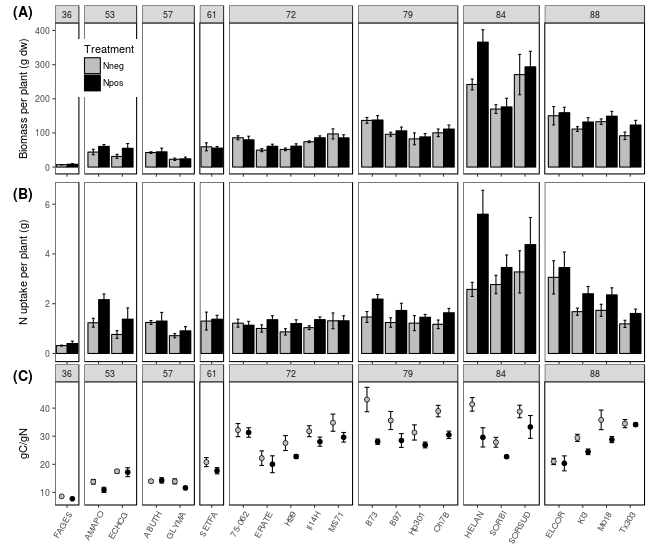

In [66]:
%%R -w 650 -h 550
require(cowplot)
dodge <- position_dodge(width=0.9)
Biolimits <- aes(ymax = Bm_mean + Bm_se, ymin=Bm_mean - Bm_se)
p = ggplot(data=Means, aes(x=Plant, y=Bm_mean, fill=Treatment)) +
    geom_bar(stat="identity", position=dodge, colour = "Black") +
    geom_errorbar(Biolimits, position=dodge, width=0.25) +
    facet_grid(~DAP, scales = "free_x", space = "free_x") +
    scale_fill_manual(values=c("grey", "black")) +
    labs(
    x = "Plant",
    y = "Biomass per plant (g dw)") +
    theme_pub() +
    theme(
    axis.title.x = element_blank(),
    axis.text.x = element_blank(),
    legend.position = c(0.09, 0.70))


Nlimits <- aes(ymax = Nmean + Nse, ymin=Nmean - Nse)
p1 = ggplot(data=Means, aes(x=Plant, y=Nmean, fill=Treatment)) +
    geom_bar(stat="identity", position=dodge, colour = "Black") +
    geom_errorbar(Nlimits, position=dodge, width=0.25) +
    scale_fill_manual(values=c("grey", "black")) +
    facet_grid(~DAP, scales = "free_x", space = "free_x") +
    labs(
    x = "Plant",
    y = "N uptake per plant (g)") +
    theme_pub() +
    theme(
    strip.text = element_blank(),
   # plot.title = element_text(lineheight=.8, face="bold", size = 20),
    axis.title.x = element_blank(),
   # axis.title.y = element_text(size = 20, vjust = 1.5),
       axis.text.x = element_blank(),
   # axis.text.y = element_text(size = 18),
    legend.position = "none",
    #legend.key.size = unit(0.1, "in"),
    plot.margin = unit(c(0, 0, 0, .55), "cm"))

CNlimits <- aes(ymax = CN_mean + CN_se, ymin=CN_mean - CN_se)
p2 = ggplot(data=Means, aes(x=Plant, y=CN_mean, fill = Treatment)) +
    geom_errorbar(CNlimits, position=dodge, width=0.4) +    
    geom_point(stat="identity", position=dodge, pch = 21, size = 2) +
    
    scale_fill_manual(values=c("grey", "black")) +
    facet_grid(~DAP, scales = "free_x", space = "free_x") +
    labs(
    x = "Plant",
    y = "gC/gN") +
    theme_pub() +
    theme(
    #strip.text = element_blank(),
   # axis.title = element_text(size = 20),
    axis.title.x = element_blank(),
    axis.text.x = element_text(angle = 60, hjust = 1, vjust = 1),
    #axis.text.y = element_text(size = 18, hjust = 1),
    legend.position = "none",
   # legend.key.size = unit(0.6, "in"),
    plot.margin = unit(c(0, 0, 0, .2), "cm"))
 
# Ni_limits <- aes(ymax = Ni + Ni_se, ymin=Ni - Ni_se)
# p3 = ggplot(data=Means, aes(x=Plant, y=Ni, fill = Treatment)) +
#     geom_errorbar(Ni_limits, position=dodge, width=0.4) +    
#     geom_point(stat="identity", position=dodge, pch = 21, size = 2) +
    
#     scale_fill_manual(values=c("grey", "black")) +
#     facet_grid(~DAP, scales = "free_x", space = "free_x") +
#     labs(
#     x = "Plant",
#     y = "InorganicN (mg/kg)") +
#     theme_pub() +
#     theme(
#     #strip.text = element_blank(),
#    # axis.title = element_text(size = 20),
#     axis.title.x = element_blank(),
#     axis.text.x = element_text(angle = 60, hjust = 1, vjust = 1),
#     #axis.text.y = element_text(size = 18, hjust = 1),
#     legend.position = "none",
#    # legend.key.size = unit(0.6, "in"),
#     plot.margin = unit(c(0, 0, 0, .2), "cm"))
 
#grid.arrange(p, p1,p2, ncol = 1)
plot_grid(p, p1, p2,  ncol = 1, align = 'v', labels = c("(A)", "(B)", "(C)"))


In [67]:
%%R
PlotOut = plot_grid(p, p1, p2, ncol = 1, align = 'v', labels = c("(A)", "(B)", "(C)"))
ggsave(PlotOut, filename = '/home/bryan/RhizCG/figures/ms_figures/Biomass_N_CN.svg', width = 6.5, height = 5.5, units = "in")

# Check Maize modeled residuals vs annualls calculated residuals
* determine if A_resids can be used for all plants

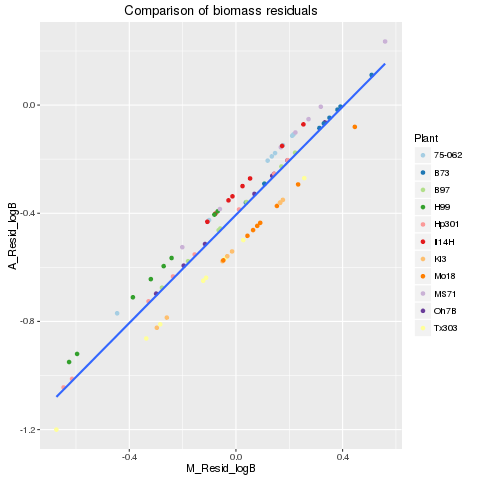

In [72]:
%%R
data = filter(Master, Type == "Maize")

p = ggplot(data)
p = p + geom_point(aes(M_Resid_logB, A_Resid_logB, fill = Plant, colour = Plant), pch = 21 )
p = p + stat_smooth(method = "lm", aes(y= A_Resid_logB, x=M_Resid_logB), se = FALSE)
p = p + scale_fill_brewer(palette="Paired")
p = p + scale_colour_brewer(palette="Paired")
p = p + ggtitle("Comparison of biomass residuals")
p

* Using annual model introduces systemic bias based on sampling date, best to use maize calculated residuals